In [13]:
!pip install category_encoders

In [14]:
import pandas as pd
import numpy as np

## Data uploading and preprocessing


In [15]:
from google.colab import drive # connect to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_excel('/content/drive/MyDrive/Final export tables/df_desc.xlsx')
df.head()


,Unnamed: 0,id,SITE,SUBJID,Sex,PTSTAT,RELAPYN,TRNUM,TRTYPE,TRSOURCE,...,"('Unnamed: 8', 3.0, 'acute GVHD')","('Unnamed: 8', 3.0, 'chronic GVHD')",FU_time,Death_time,Age_tr,Relapse_time,aGVHD_time,cGVHD_time,compet_relapse,status_rel
0,1,1,1,1001,female,0,no,1,3,0,...,NaN,NaN,754,NaN,30.647502,NaN,52.0,NaN,754.0,alive
1,2,2,1,1002,male,1,yes,1,1,0,...,NaN,NaN,349,349.0,21.965777,217.0,86.0,NaN,217.0,yes
2,3,3,1,1003,female,1,no,2,2,0,...,NaN,NaN,370,370.0,37.615332,NaN,45.0,189.0,370.0,died
3,4,4,1,1004,female,0,yes,1,2,0,...,NaN,NaN,484,NaN,34.151951,68.0,NaN,159.0,68.0,yes
4,5,5,1,1005,female,0,no,1,1,0,...,NaN,NaN,981,NaN,32.388775,NaN,18.0,290.0,981.0,alive


In [17]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df.head()

,SITE,SUBJID,Sex,PTSTAT,RELAPYN,TRNUM,TRTYPE,TRSOURCE,CONDTYPE,aGVHD,...,"('Unnamed: 8', 3.0, 'acute GVHD')","('Unnamed: 8', 3.0, 'chronic GVHD')",FU_time,Death_time,Age_tr,Relapse_time,aGVHD_time,cGVHD_time,compet_relapse,status_rel
0,1,1001,female,0,no,1,3,0,0,yes,...,NaN,NaN,754,NaN,30.647502,NaN,52.0,NaN,754.0,alive
1,1,1002,male,1,yes,1,1,0,1,yes,...,NaN,NaN,349,349.0,21.965777,217.0,86.0,NaN,217.0,yes
2,1,1003,female,1,no,2,2,0,0,yes,...,NaN,NaN,370,370.0,37.615332,NaN,45.0,189.0,370.0,died
3,1,1004,female,0,yes,1,2,0,0,no,...,NaN,NaN,484,NaN,34.151951,68.0,NaN,159.0,68.0,yes
4,1,1005,female,0,no,1,1,0,0,yes,...,NaN,NaN,981,NaN,32.388775,NaN,18.0,290.0,981.0,alive


In [18]:
df.PTSTAT.value_counts()

0    252
1     91
Name: PTSTAT, dtype: int64

In [19]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Sex',
                                 'RELAPYN',
                                 'GVGD_proph'],return_df=True,
                           mapping=[{'col':'Sex', 'mapping':{'female':0,'male':1}},
                                    {'col':'RELAPYN', 'mapping':{'no':0,'yes':1}},
                                    {'col':'GVGD_proph', 'mapping':{'Othero':0,'Ptcy':1}}
                                    ])


df[['Sex', 'PTSTAT', 'RELAPYN', 'GVGD_proph']] = encoder.fit_transform(df[['Sex', 'PTSTAT', 'RELAPYN', 'GVGD_proph']])

df.head()

,SITE,SUBJID,Sex,PTSTAT,RELAPYN,TRNUM,TRTYPE,TRSOURCE,CONDTYPE,aGVHD,...,"('Unnamed: 8', 3.0, 'acute GVHD')","('Unnamed: 8', 3.0, 'chronic GVHD')",FU_time,Death_time,Age_tr,Relapse_time,aGVHD_time,cGVHD_time,compet_relapse,status_rel
0,1,1001,0,0,0.0,1,3,0,0,yes,...,NaN,NaN,754,NaN,30.647502,NaN,52.0,NaN,754.0,alive
1,1,1002,1,1,1.0,1,1,0,1,yes,...,NaN,NaN,349,349.0,21.965777,217.0,86.0,NaN,217.0,yes
2,1,1003,0,1,0.0,2,2,0,0,yes,...,NaN,NaN,370,370.0,37.615332,NaN,45.0,189.0,370.0,died
3,1,1004,0,0,1.0,1,2,0,0,no,...,NaN,NaN,484,NaN,34.151951,68.0,NaN,159.0,68.0,yes
4,1,1005,0,0,0.0,1,1,0,0,yes,...,NaN,NaN,981,NaN,32.388775,NaN,18.0,290.0,981.0,alive


In [20]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['aGVHD',
                                 'cGvHD'],return_df=True,
                           mapping=[{'col':'aGVHD', 'mapping':{'yes':1,'no':0}},
                                    {'col':'cGvHD', 'mapping':{'yes':1,'no':0}}
                                    ])


df[['aGVHD', 'cGvHD']] = encoder.fit_transform(df[['aGVHD', 'cGvHD']])

df.head()

,SITE,SUBJID,Sex,PTSTAT,RELAPYN,TRNUM,TRTYPE,TRSOURCE,CONDTYPE,aGVHD,...,"('Unnamed: 8', 3.0, 'acute GVHD')","('Unnamed: 8', 3.0, 'chronic GVHD')",FU_time,Death_time,Age_tr,Relapse_time,aGVHD_time,cGVHD_time,compet_relapse,status_rel
0,1,1001,0,0,0.0,1,3,0,0,1,...,NaN,NaN,754,NaN,30.647502,NaN,52.0,NaN,754.0,alive
1,1,1002,1,1,1.0,1,1,0,1,1,...,NaN,NaN,349,349.0,21.965777,217.0,86.0,NaN,217.0,yes
2,1,1003,0,1,0.0,2,2,0,0,1,...,NaN,NaN,370,370.0,37.615332,NaN,45.0,189.0,370.0,died
3,1,1004,0,0,1.0,1,2,0,0,0,...,NaN,NaN,484,NaN,34.151951,68.0,NaN,159.0,68.0,yes
4,1,1005,0,0,0.0,1,1,0,0,1,...,NaN,NaN,981,NaN,32.388775,NaN,18.0,290.0,981.0,alive


In [21]:
df.aGVHD_grade = df.aGVHD_grade.replace([np.nan], [0])
df.aGVHD_grade.value_counts()

0.0    103
1.0     99
2.0     69
3.0     48
4.0     24
Name: aGVHD_grade, dtype: int64

In [22]:
df.cGVHD_grade = df.cGVHD_grade.replace([np.nan, 'mild', 'moderate', 'severe'], [0, 1, 2, 3])
df.cGVHD_grade.value_counts()

0    146
3     80
2     68
1     49
Name: cGVHD_grade, dtype: int64

In [23]:
df.GVGD_proph.value_counts()
df.GVGD_proph = df.GVGD_proph.replace([-1], [0])
df.GVGD_proph.value_counts()

1.0    306
0.0     37
Name: GVGD_proph, dtype: int64

In [24]:
df_1 = df[["SUBJID",
           "('Therapy outcome', 1.0, 'acute GVHD')",
           "('Therapy outcome', 2.0, 'acute GVHD')",
           "('Therapy outcome', 3.0, 'acute GVHD')"]].replace([np.nan, 'complete response', 'partial response', 'no response', 'progression', 'not estimated', 'no treatment'], [0, 3, 3, 2, 2, 1, 1])


df['aTherapy_outcome'] = df_1[["('Therapy outcome', 1.0, 'acute GVHD')",
                            "('Therapy outcome', 2.0, 'acute GVHD')",
                            "('Therapy outcome', 3.0, 'acute GVHD')"]].max(axis=1)


#complete response, partial response
#no response, progression
#not estimated, no treatment

In [25]:
df_2 = df[["SUBJID",
           "('Therapy outcome', 1.0, 'chronic GVHD')",
           "('Therapy outcome', 2.0, 'chronic GVHD')",
           "('Therapy outcome', 3.0, 'chronic GVHD')"]].replace([np.nan, 'complete response', 'partial response', 'no response', 'progression', 'not estimated', 'no treatment'], [0, 3, 3, 2, 2, 1, 1])


df['cTherapy_outcome'] = df_2[["('Therapy outcome', 1.0, 'chronic GVHD')",
                            "('Therapy outcome', 2.0, 'chronic GVHD')",
                            "('Therapy outcome', 3.0, 'chronic GVHD')"]].max(axis=1)

<ipython-input-25-83e1e178d5d8>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['cTherapy_outcome'] = df_2[["('Therapy outcome', 1.0, 'chronic GVHD')",


In [26]:
df.drop([  "('Therapy outcome', 1.0, 'acute GVHD')",
           "('Therapy outcome', 1.0, 'chronic GVHD')",
           "('Therapy outcome', 2.0, 'acute GVHD')",
           "('Therapy outcome', 2.0, 'chronic GVHD')",
           "('Therapy outcome', 3.0, 'acute GVHD')",
           "('Therapy outcome', 3.0, 'chronic GVHD')"], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SITE                                 343 non-null    int64  
 1   SUBJID                               343 non-null    int64  
 2   Sex                                  343 non-null    int64  
 3   PTSTAT                               343 non-null    int64  
 4   RELAPYN                              343 non-null    float64
 5   TRNUM                                343 non-null    int64  
 6   TRTYPE                               343 non-null    int64  
 7   TRSOURCE                             343 non-null    int64  
 8   CONDTYPE                             343 non-null    int64  
 9   aGVHD                                343 non-null    int64  
 10  cGvHD                                343 non-null    int64  
 11  aGVHD_grade                     

In [29]:
df_add = pd.read_excel('/content/DM_13.08.2023_clean_noTREAT (1).xlsx')
df_add.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Unnamed: 0                                343 non-null    int64         
 1   SITE                                      343 non-null    int64         
 2   SUBJID                                    343 non-null    int64         
 3   Birth                                     343 non-null    datetime64[ns]
 4   Sex                                       343 non-null    int64         
 5   PTSTAT                                    343 non-null    int64         
 6   LCDTC                                     257 non-null    object        
 7   DEATHDTC                                  86 non-null     object        
 8   RELAPYN                                   343 non-null    int64         
 9   RELAPDTC                        

In [485]:
df = df.merge(df_add[['SUBJID',
                      'Main Diagnosis_Acute',
                      'Main Diagnosis_CLP',
                      'Main Diagnosis_CMP']], left_on=['SUBJID'], right_on=['SUBJID'])

In [30]:
df

,SITE,SUBJID,Sex,PTSTAT,RELAPYN,TRNUM,TRTYPE,TRSOURCE,CONDTYPE,aGVHD,...,FU_time,Death_time,Age_tr,Relapse_time,aGVHD_time,cGVHD_time,compet_relapse,status_rel,aTherapy_outcome,cTherapy_outcome
0,1,1001,0,0,0.0,1,3,0,0,1,...,754,NaN,30.647502,NaN,52.0,NaN,754.0,alive,3,0
1,1,1002,1,1,1.0,1,1,0,1,1,...,349,349.0,21.965777,217.0,86.0,NaN,217.0,yes,0,0
2,1,1003,0,1,0.0,2,2,0,0,1,...,370,370.0,37.615332,NaN,45.0,189.0,370.0,died,2,3
3,1,1004,0,0,1.0,1,2,0,0,0,...,484,NaN,34.151951,68.0,NaN,159.0,68.0,yes,0,3
4,1,1005,0,0,0.0,1,1,0,0,1,...,981,NaN,32.388775,NaN,18.0,290.0,981.0,alive,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,4,4031,0,0,0.0,1,2,0,0,1,...,191,NaN,59.463381,NaN,164.0,NaN,191.0,alive,3,0
339,4,4032,1,0,1.0,2,1,0,0,1,...,1014,NaN,22.272416,591.0,24.0,271.0,591.0,yes,0,0
340,4,4033,0,0,1.0,1,2,0,1,1,...,606,NaN,23.457906,263.0,24.0,406.0,263.0,yes,0,0
341,4,4034,0,0,1.0,1,2,0,0,1,...,403,NaN,35.518138,211.0,7.0,NaN,211.0,yes,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SITE                                 343 non-null    int64  
 1   SUBJID                               343 non-null    int64  
 2   Sex                                  343 non-null    int64  
 3   PTSTAT                               343 non-null    int64  
 4   RELAPYN                              343 non-null    float64
 5   TRNUM                                343 non-null    int64  
 6   TRTYPE                               343 non-null    int64  
 7   TRSOURCE                             343 non-null    int64  
 8   CONDTYPE                             343 non-null    int64  
 9   aGVHD                                343 non-null    int64  
 10  cGvHD                                343 non-null    int64  
 11  aGVHD_grade                     

In [53]:
#df.to_excel('/content/DM_15.08.2023_clean_noTREAT.xlsx')
df = pd.read_excel('/content/DM_15.08.2023_clean_noTREAT.xlsx')

In [54]:
out = list(df.PTSTAT)
surv = list(df.FU_time)
df['out'] = out
df['surv'] = surv




In [55]:
df.columns

Index(['Unnamed: 0', 'SITE', 'SUBJID', 'Sex', 'PTSTAT', 'RELAPYN', 'TRNUM',
       'TRTYPE', 'TRSOURCE', 'CONDTYPE', 'aGVHD', 'cGvHD', 'aGVHD_grade',
       'cGVHD_grade', 'GVGD_proph', '('Unnamed: 8', 1.0, 'acute GVHD')',
       '('Unnamed: 8', 1.0, 'chronic GVHD')',
       '('Unnamed: 8', 2.0, 'acute GVHD')',
       '('Unnamed: 8', 2.0, 'chronic GVHD')',
       '('Unnamed: 8', 3.0, 'acute GVHD')',
       '('Unnamed: 8', 3.0, 'chronic GVHD')', 'FU_time', 'Death_time',
       'Age_tr', 'Relapse_time', 'aGVHD_time', 'cGVHD_time', 'compet_relapse',
       'status_rel', 'aTherapy_outcome', 'cTherapy_outcome',
       'Main Diagnosis_Acute', 'Main Diagnosis_CLP', 'Main Diagnosis_CMP',
       'out', 'surv'],
      dtype='object')

In [45]:
outcome = 'PTSTAT'

variables = ['Sex', 'TRNUM', 'TRTYPE', 'TRSOURCE',
             'CONDTYPE', 'GVGD_proph', 'Age_tr', 'Main Diagnosis_Acute',
             'Main Diagnosis_CLP', 'Main Diagnosis_CMP', 'aGVHD_grade', 'aTherapy_outcome', 'PTSTAT']


In [46]:
df_survival = df[variables]
df_survival.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   343 non-null    int64  
 1   TRNUM                 343 non-null    int64  
 2   TRTYPE                343 non-null    int64  
 3   TRSOURCE              343 non-null    int64  
 4   CONDTYPE              343 non-null    int64  
 5   GVGD_proph            343 non-null    int64  
 6   Age_tr                343 non-null    float64
 7   Main Diagnosis_Acute  343 non-null    int64  
 8   Main Diagnosis_CLP    343 non-null    int64  
 9   Main Diagnosis_CMP    343 non-null    int64  
 10  aGVHD_grade           343 non-null    int64  
 11  aTherapy_outcome      343 non-null    int64  
 12  PTSTAT                343 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 35.0 KB


In [47]:

df_survival['TRTYPE'] = df_survival['TRTYPE'].replace([2], [5])
df_survival['TRTYPE'].value_counts()


<ipython-input-47-208f259e9994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survival['TRTYPE'] = df_survival['TRTYPE'].replace([2], [5])


1    156
5     65
3     61
4     61
Name: TRTYPE, dtype: int64

## RobustScaler

In [48]:
# Perform Robust scaling
q1 = df['Age_tr'].quantile(0.25)
q3 = df['Age_tr'].quantile(0.75)
iqr = q3 - q1
df['Age_tr'] = (df['Age_tr'] - df['Age_tr'].median()) / iqr


## Logistic regression

In [ ]:
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_recall_curve, recall_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
import sklearn

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
lr=LogisticRegression()
print('Parameters currently in use:\n')
pprint(lr.get_params())


Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_survival, test_size=0.2, random_state=42, stratify=df_survival['PTSTAT'])

# print the shapes of the resulting datasets
print(f'The shape of the training set is: {X_train.shape}')
#print(f'The shape of the training set is: {X_val.shape}')
print(f'The shape of the test set is: {X_test.shape}')


The shape of the training set is: (274, 13)
The shape of the test set is: (69, 13)


In [ ]:
y_train=X_train.PTSTAT
X_train=X_train.drop('PTSTAT', axis=1)

y_test=X_test.PTSTAT
X_test=X_test.drop('PTSTAT', axis=1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=10000, solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring='recall')
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("f1:", logreg_cv.score(X_test,y_test))

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
f1: 0.3333333333333333


## Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2, scoring='f1')

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [423]:
print("f1:",grid_search.score(X_test,y_test))

f1: 0.606060606060606


## XGBClassifier

In [424]:
#from sklearn import XGBClassifier
from xgboost import XGBClassifier
XGB = XGBClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(XGB.get_params())


Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': None,
 'validate_parameters': None,
 'verbosity': None}


In [425]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [426]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [429]:
XGBClassifier = GridSearchCV(estimator=estimator, param_grid=parameters,
                           scoring = 'f1', n_jobs = 10,  cv=5, verbose=True
)
XGBClassifier.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='f1', verbose=True)

In [439]:
print("f1 :",XGBClassifier.score(X_test, y_test))

f1 : 0.3870967741935484


## Decision trees

## Stacking

In [432]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [435]:
df_survival_y=df_survival.PTSTAT
df_survival_X=df_survival.drop('PTSTAT', axis=1)


In [456]:
# Create 7 models

lr=LogisticRegression(max_iter=100000)
knn= KNeighborsClassifier(n_neighbors=3)
cart= DecisionTreeClassifier(max_depth=10) # parameeters above
svm= SVC(probability=True, C=100000)
bayes= GaussianNB()
rfk= RandomForestClassifier(max_depth=10) # parameters above
abk= AdaBoostClassifier()

models = [lr, knn, cart, svm, bayes, rfk, abk]
values = []

# Cross-validation

scoring = ['accuracy', 'balanced_accuracy', 'f1', 'recall','precision']

for model in models:
  print(model)
  name = str(model).split('(')[0] + '_scores'
  comment = str(model).split('(')[0] + 'score:'

  name = cross_validate(model, df_survival_X, df_survival_y, scoring=scoring, return_estimator=True, cv=5)
  #print(comment, name)

  # Retrain the model and evaluate
  # Here, since scikit-learn will clone a new model on every iteration of cross validation,
  #the model we created remain untrained after cross validation.
  #Otherwise, we should reset the model by cloning a new one using linreg = sklearn.base.clone(linreg).

  model=sklearn.base.clone(model)
  model.fit(df_survival_X, df_survival_y)
  print("Accuracy:", name['test_accuracy'].mean())
  values.append(name['test_accuracy'].mean())

  print("Balanced Accuracy:", name['test_balanced_accuracy'].mean())
  values.append(name['test_balanced_accuracy'].mean())

  print("F1 score:", name['test_f1'].mean())
  values.append(name['test_f1'].mean())

  print("Recall:", name['test_recall'].mean())
  values.append(name['test_recall'].mean())

  print("Precision:", name['test_precision'].mean())
  values.append(name['test_precision'].mean())

  print("_______________________________________________________")

LogisticRegression(max_iter=100000)
Accuracy: 0.7521312872975277
Balanced Accuracy: 0.6095693154454764
F1 score: 0.39181997090784637
Recall: 0.30643274853801167
Precision: 0.5515151515151515
_______________________________________________________
KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.7522591645353793
Balanced Accuracy: 0.6564368765049879
F1 score: 0.48866049892715235
Recall: 0.4514619883040936
Precision: 0.5439102564102564
_______________________________________________________
DecisionTreeClassifier(max_depth=10)
Accuracy: 0.7288576300085252
Balanced Accuracy: 0.6265070519435845
F1 score: 0.44131447701031623
Recall: 0.4076023391812866
Precision: 0.5119565217391304
_______________________________________________________
SVC(C=100000, probability=True)
Accuracy: 0.6266410912190964
Balanced Accuracy: 0.577608531131751
F1 score: 0.40063609960806723
Recall: 0.4730994152046784
Precision: 0.351286231884058
_______________________________________________________
GaussianNB()
Accurac

In [457]:
from sklearn.ensemble import StackingClassifier

lr_1 = LogisticRegression(max_iter=100000)  # defining meta-classifier

clf_stack = StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=100000)), ('knn', KNeighborsClassifier(n_neighbors=3)),
                                           ('cart', DecisionTreeClassifier(max_depth=10)), ('svm', SVC(probability=True, C=100000)), ('bayes', GaussianNB()),
                                           ('rfk', RandomForestClassifier(max_depth=10)), ('abk', AdaBoostClassifier())],
                                           final_estimator = lr_1, stack_method = 'predict_proba')

In [458]:
model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test)       # predictions on test data using stacked model


In [459]:
score = accuracy_score(y_test, pred_stack)
score_1 = balanced_accuracy_score(y_test, pred_stack)
score_2 = f1_score(y_test, pred_stack)
score_3 = precision_recall_curve(y_test, pred_stack)
score_4 = recall_score(y_test, pred_stack)
score_5 = precision_score(y_test, pred_stack)

print('Accuracy: %.1f' % (score*100))
print('Balanced Accuracy: %.1f' % (score_1*100))
print('f1_scorey: %.1f' % (score_2*100))
#print('precision_recall_curve: %.3f' % (score_3*100)) plot!!!
print('recall_score: %.1f' % (score_4*100))
print('precision_score: %.1f' % (score_5*100))
values.extend([score, score_1, score_2, score_4, score_5])
print(values)

Accuracy: 79.7
Balanced Accuracy: 64.7
f1_scorey: 46.2
recall_score: 33.3
precision_score: 75.0
[0.7521312872975277, 0.6095693154454764, 0.39181997090784637, 0.30643274853801167, 0.5515151515151515, 0.7522591645353793, 0.6564368765049879, 0.48866049892715235, 0.4514619883040936, 0.5439102564102564, 0.7288576300085252, 0.6265070519435845, 0.44131447701031623, 0.4076023391812866, 0.5119565217391304, 0.6266410912190964, 0.577608531131751, 0.40063609960806723, 0.4730994152046784, 0.351286231884058, 0.6939471440750214, 0.661453732370141, 0.5032308933623393, 0.5923976608187134, 0.44208920491273435, 0.7640238704177323, 0.6431214310285518, 0.4621134593993326, 0.3853801169590643, 0.5797202797202796, 0.7377237851662404, 0.6008565531475749, 0.3723560535325241, 0.30877192982456136, 0.4905555555555555, 0.7971014492753623, 0.6470588235294118, 0.46153846153846156, 0.3333333333333333, 0.75]


In [460]:
values = [round(num, 3) for num in values]

print(values)

len(values)

[0.752, 0.61, 0.392, 0.306, 0.552, 0.752, 0.656, 0.489, 0.451, 0.544, 0.729, 0.627, 0.441, 0.408, 0.512, 0.627, 0.578, 0.401, 0.473, 0.351, 0.694, 0.661, 0.503, 0.592, 0.442, 0.764, 0.643, 0.462, 0.385, 0.58, 0.738, 0.601, 0.372, 0.309, 0.491, 0.797, 0.647, 0.462, 0.333, 0.75]


40

In [461]:
new_list = [values[i:i+5] for i in range(0, len(values), 5)]
new_list

[[0.752, 0.61, 0.392, 0.306, 0.552],
 [0.752, 0.656, 0.489, 0.451, 0.544],
 [0.729, 0.627, 0.441, 0.408, 0.512],
 [0.627, 0.578, 0.401, 0.473, 0.351],
 [0.694, 0.661, 0.503, 0.592, 0.442],
 [0.764, 0.643, 0.462, 0.385, 0.58],
 [0.738, 0.601, 0.372, 0.309, 0.491],
 [0.797, 0.647, 0.462, 0.333, 0.75]]

In [462]:
df = pd.DataFrame(new_list)
df.columns=['Accuracy', 'Balanced Accuracy', 'F1 score', 'Recall', 'Precision', ]
df['Model'] = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC', 'GaussianNB', 'RandomForestClassifier', 'AdaBoostClassifier', 'Stacked']
df=df.set_index('Model')
df

,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Model,,,,,
LogisticRegression,0.752,0.610,0.392,0.306,0.552
KNeighborsClassifier,0.752,0.656,0.489,0.451,0.544
DecisionTreeClassifier,0.729,0.627,0.441,0.408,0.512
SVC,0.627,0.578,0.401,0.473,0.351
GaussianNB,0.694,0.661,0.503,0.592,0.442
RandomForestClassifier,0.764,0.643,0.462,0.385,0.580
AdaBoostClassifier,0.738,0.601,0.372,0.309,0.491
Stacked,0.797,0.647,0.462,0.333,0.750


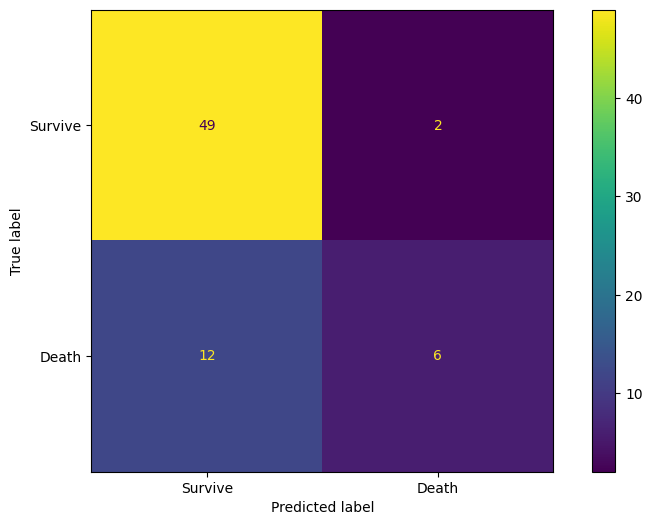

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


fig, ax = plt.subplots(figsize=(10, 6))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_stack),display_labels=["Survive", "Death"],)
cmp.plot(ax=ax)
plt.show();

## Survival Random **forest**

In [83]:
!pip install scikit-survival

In [84]:
!pip install lifelines

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators

In [86]:
from sksurv.util import Surv

event_indicator = df['out'].values
event_time = df['surv'].values


y = Surv.from_arrays(event_indicator, event_time)

In [87]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


In [88]:
from pprint import pprint
# Look at parameters used by our current forest
rsf=RandomSurvivalForest()
print('Parameters currently in use:\n')
pprint(rsf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [89]:
outcome = 'survival'

variables = ['Sex', 'TRNUM', 'TRTYPE', 'TRSOURCE',
             'CONDTYPE', 'GVGD_proph', 'Age_tr', 'Main Diagnosis_Acute',
             'Main Diagnosis_CLP', 'Main Diagnosis_CMP', 'aGVHD_grade', 'aTherapy_outcome']

In [90]:
df_surv=df[variables]

In [91]:
df_surv

,Sex,TRNUM,TRTYPE,TRSOURCE,CONDTYPE,GVGD_proph,Age_tr,Main Diagnosis_Acute,Main Diagnosis_CLP,Main Diagnosis_CMP,aGVHD_grade,aTherapy_outcome
0,0,1,3,0,0,1,30.647502,1,0,0,1,3
1,1,1,1,0,1,0,21.965777,1,0,0,1,0
2,0,2,2,0,0,0,37.615332,1,0,0,3,2
3,0,1,2,0,0,1,34.151951,0,0,1,0,0
4,0,1,1,0,0,1,32.388775,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,1,2,0,0,1,59.463381,0,0,1,1,3
339,1,2,1,0,0,1,22.272416,1,0,0,1,0
340,0,1,2,0,1,1,23.457906,1,0,0,1,0
341,0,1,2,0,0,1,35.518138,1,0,0,1,0


In [92]:
df_surv_y = y
df_surv_X = df_surv

In [70]:
random_state = 20

X_train, X_test, y_train, y_test = train_test_split(df_surv_X, df_surv_y, test_size=0.25, random_state=random_state)

rsf = RandomSurvivalForest(max_depth=2,
    n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=random_state
)
rsf.fit(X_train, y_train)


RandomSurvivalForest(max_depth=2, min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=20)

In [71]:
rsf.score(X_test, y_test)

0.7459239130434783

In [129]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=random_state)

In [130]:
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
aGVHD_grade,0.106997,0.046837
TRTYPE,0.036504,0.014255
aTherapy_outcome,0.013859,0.023249
CONDTYPE,0.012772,0.008569
Sex,0.008650,0.014025
Main Diagnosis_CMP,0.003080,0.003551
TRSOURCE,0.001902,0.003283
Main Diagnosis_Acute,0.000272,0.008710
TRNUM,-0.002219,0.005194
GVGD_proph,-0.003351,0.005767


In [658]:
# https://k-d-w.org/blog/2021/10/scikit-survival-0.16-released/

import numpy as np
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import encode_categorical

lower, upper = np.percentile(y["time"], [10, 90])
gbsg_times = np.arange(lower, upper + 1)

In [659]:
from sksurv.ensemble import RandomSurvivalForest

rsf_gbsg = RandomSurvivalForest(random_state=1)

In [660]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=1)

cv_param_grid = {
    "estimator__max_depth": np.arange(1, 10, dtype=int),
}


In [661]:
from sklearn.model_selection import GridSearchCV
from sksurv.metrics import as_concordance_index_ipcw_scorer

gcv_cindex = GridSearchCV(
    as_concordance_index_ipcw_scorer(rsf_gbsg, tau=gbsg_times[-1]),
    param_grid=cv_param_grid,
    cv=cv,
).fit(X_train, y_train)

In [662]:
from sksurv.metrics import as_integrated_brier_score_scorer

gcv_ibs = GridSearchCV(
    as_integrated_brier_score_scorer(rsf_gbsg, times=gbsg_times),
    param_grid=cv_param_grid,
    cv=cv,
).fit(X_train, y_train)

In [664]:
from sksurv.metrics import as_cumulative_dynamic_auc_scorer

gcv_iauc = GridSearchCV(
    as_cumulative_dynamic_auc_scorer(rsf_gbsg, times=gbsg_times),
    param_grid=cv_param_grid,
    cv=cv,
).fit(X_train, y_train)

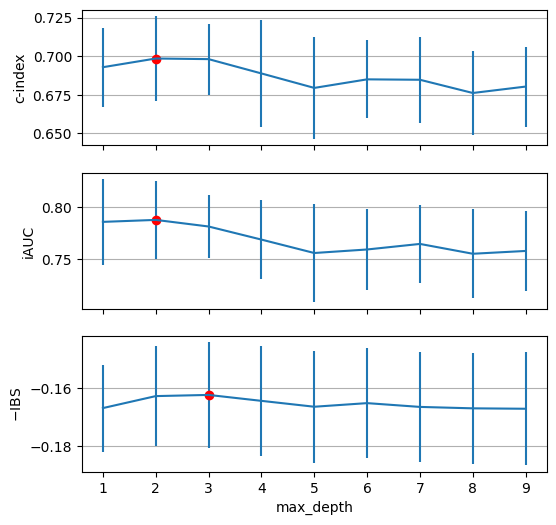

In [665]:
import matplotlib.pyplot as plt

def plot_grid_search_results(gcv, ax, name):
    ax.errorbar(
        x=gcv.cv_results_["param_estimator__max_depth"].filled(),
        y=gcv.cv_results_["mean_test_score"],
        yerr=gcv.cv_results_["std_test_score"],
    )
    ax.plot(
        gcv.best_params_["estimator__max_depth"],
        gcv.best_score_,
        'ro',
    )
    ax.set_ylabel(name)
    ax.yaxis.grid(True)

_, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
axs[-1].set_xlabel("max_depth")

plot_grid_search_results(gcv_cindex, axs[0], "c-index")
plot_grid_search_results(gcv_iauc, axs[1], "iAUC")
plot_grid_search_results(gcv_ibs, axs[2], "$-$IBS")

## Gradient Boosted Models

In [ ]:
# https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sksurv.datasets import load_breast_cancer
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder


In [75]:
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex, 3))

0.756


In [122]:
from sklearn.inspection import permutation_importance

result = permutation_importance(est_cph_tree, X_test, y_test, n_repeats=15, random_state=random_state)

In [123]:
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)


,importances_mean,importances_std
aGVHD_grade,0.119407,0.041125
TRTYPE,0.047985,0.014872
Age_tr,0.017188,0.032556
Main Diagnosis_CMP,0.016259,0.013067
Sex,0.003057,0.007221
CONDTYPE,0.001155,0.006222
aTherapy_outcome,0.000725,0.009653
TRNUM,0.000000,0.000000
Main Diagnosis_CLP,0.000000,0.000000
TRSOURCE,-0.001721,0.002096


In [76]:
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0)
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_test, y_test)


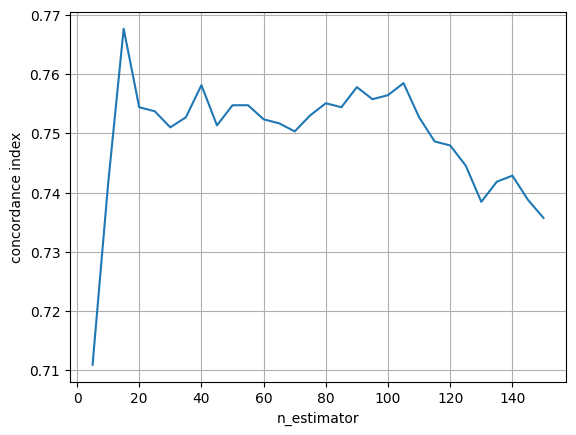

In [77]:
x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [78]:
scores_cph_ls = {}

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(learning_rate=1.0, random_state=0)
for i in range(1, 31):
    n_estimators = i * 10
    est_cph_ls.set_params(n_estimators=n_estimators)
    est_cph_ls.fit(X_train, y_train)
    scores_cph_ls[n_estimators] = est_cph_ls.score(X_test, y_test)

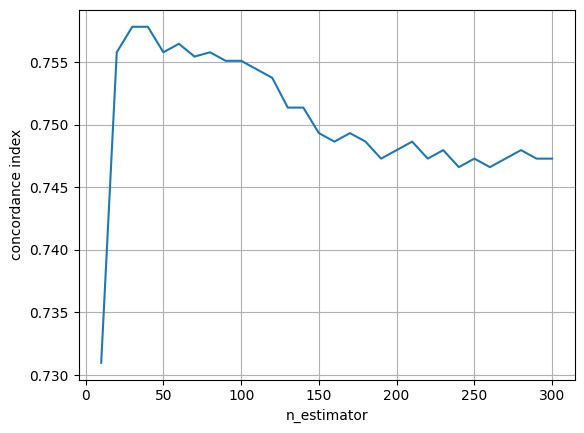

In [79]:
x, y = zip(*scores_cph_ls.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [80]:
coef = pd.Series(est_cph_ls.coef_, ["Intercept"] + X_test.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 10


Main Diagnosis_CMP     -1.041194
aGVHD_grade             0.722738
Main Diagnosis_Acute   -0.323265
Sex                     0.308022
TRTYPE                 -0.190777
GVGD_proph             -0.184918
CONDTYPE                0.174615
Main Diagnosis_CLP     -0.127512
aTherapy_outcome       -0.118127
Age_tr                  0.005404
dtype: float64

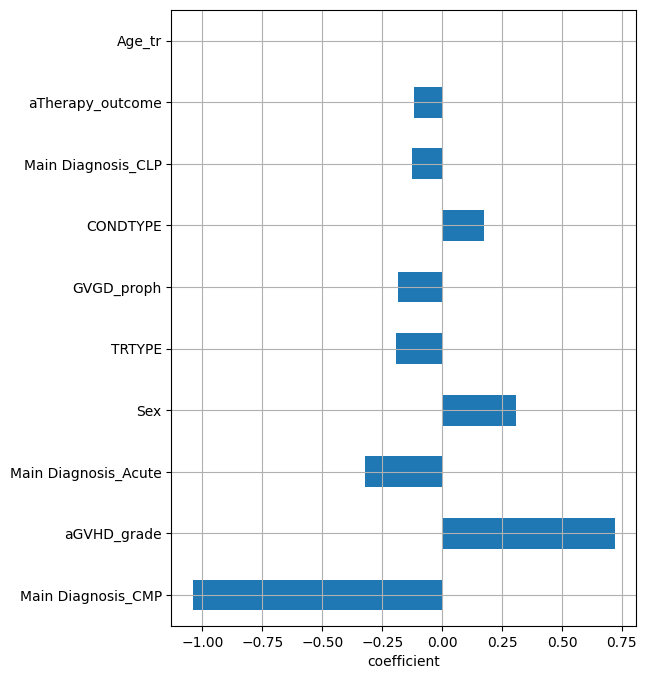

In [125]:
_, ax = plt.subplots(figsize=(6, 8))
coef.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

## Characteristics

In [98]:
#df_surv_y
#df_surv_X

In [107]:
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)

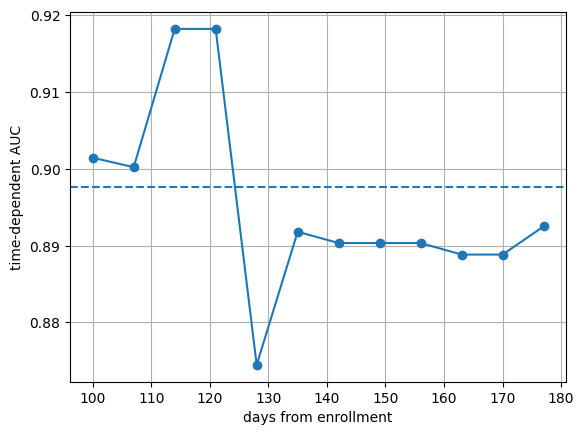

In [114]:
va_times = np.arange(100,180, 7)
rsf.fit(X_train, y_train)
rsf_risk_scores = rsf.predict(X_test)
rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, rsf_risk_scores, va_times)

plt.plot(va_times, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)


#X_train, X_test, y_train, y_test rsf, est_cph_tree

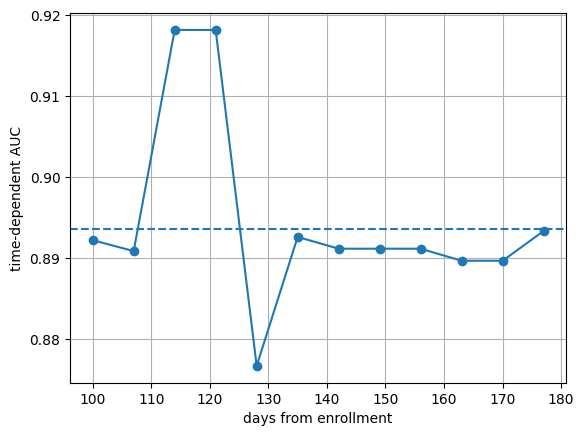

In [115]:
va_times = np.arange(100,180, 7)
est_cph_tree.fit(X_train, y_train)
est_cph_tree_risk_scores = est_cph_tree.predict(X_test)
est_cph_tree_auc, est_cph_tree_mean_auc = cumulative_dynamic_auc(y_train, y_test, est_cph_tree_risk_scores, va_times)

plt.plot(va_times, est_cph_tree_auc, marker="o")
plt.axhline(est_cph_tree_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)


#X_train, X_test, y_train, y_test rsf, est_cph_tree

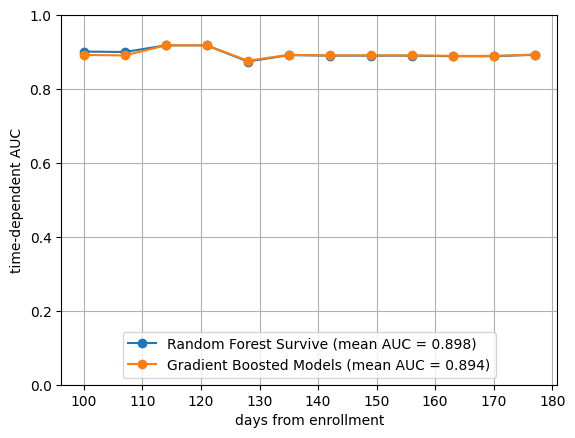

In [119]:
plt.plot(va_times, rsf_auc, "o-", label=f"Random Forest Survive (mean AUC = {rsf_mean_auc:.3f})")
plt.plot(va_times, est_cph_tree_auc, "o-", label=f"Gradient Boosted Models (mean AUC = {est_cph_tree_mean_auc:.3f})")
plt.xlabel("days from enrollment")
plt.ylim(0, 1)
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(True)

In [ ]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(best_model.coef_, index=Xt.columns, columns=["coefficient"])

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)
